## Plotting geospatial data : PEI interns 2020
This is a short notebook describing how to plot some of Large Ensemble data using python.  
I will reproduce simple versions of the first plot in the "What is a netcdf?" that Sarah put together.

In [1]:
# Import the packages that you want to use
import xarray as xr

Point to and load the data

In [2]:
# Specify the path to the data on flyingfish
rootdir = '/local/ss23/GFDL_LEs/'
# Specify which experiment you want to look at
experiment = 'RCP85'
# Specify the file name
filename = 'sst.1.rcp85.remap.1950_2100.nc'
# The combination of these defines the path
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds = xr.open_dataset(path)
# Take a look
print(' ')
print('Here we can see the structure of the netcdf file, including dimensions, variables, and attributes:')
print(' ')
ds

 
Here we can see the structure of the netcdf file, including dimensions, variables, and attributes:
 


<xarray.Dataset>
Dimensions:        (bnds: 2, st_ocean: 1, time: 1812, xt_ocean: 360, yt_ocean: 180)
Coordinates:
  * xt_ocean       (xt_ocean) float64 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * yt_ocean       (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * st_ocean       (st_ocean) float64 5.0
  * time           (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    xt_ocean_bnds  (xt_ocean, bnds) float64 ...
    yt_ocean_bnds  (yt_ocean, bnds) float64 ...
    temp           (time, st_ocean, yt_ocean, xt_ocean) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.0 (http://m...
    Conventions:               CF-1.6
    history:                   Mon Mar 11 13:52:13 2019: cdo -O remapbil,WOA2...
    filename:                  19500101.ocean_month.nc
    title:                     ESM2M-C1_all_historical_HC2_ens101
    grid_type:                 mosaic
    grid_tile:                 1
    NCO:                       4.0.3
    nco_openmp_thread_number:  1
    code_version:              $Name: fre-nctools-bronx-8 $
    CDO:                       Climate Data Operators version 1.9.0 (http://m...

#### Some very simple plots
Xarray allows us to make very simple plots, to quickly look at the data.  
Produce a simple plot of the SST in January 1950.

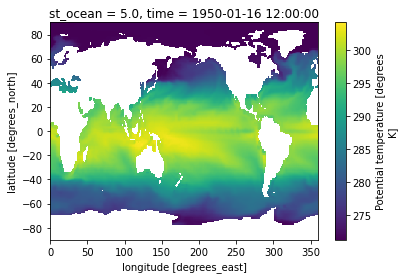

In [3]:
# 'temp' selects the temperature variable from the dataset ds
# .isel(time=0) selects the 0'th (in python indices start at 0) index of the data along the time dimension
ds['temp'].isel(time=0).plot()

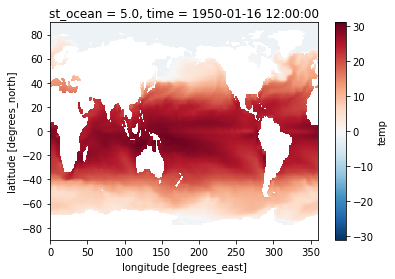

In [4]:
# Noting that temperature is shown in Kelvin, I can perform simple operations on the data before plotting (by putting in parentheses):
(ds['temp']-273.15).isel(time=0).plot()
# Because there are positive and negative values in the data, xarray automatically uses a diverging colormap

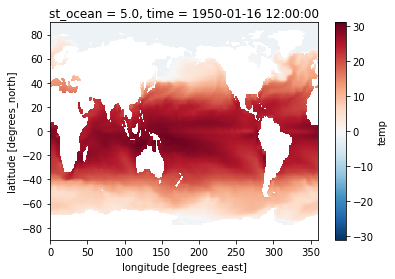

In [5]:
# I can select the time not simply from the index but also from the value itself, using .sel(time='1950-01-16')
# Here, the string '1950-01-16' is a particular format that matches the format of the time coordinates from the netcdf
(ds['temp']-273.15).sel(time='1950-01-16').plot()

#### More complicated plots
The `.plot()` tool in xarray is wonderful for quick explorations of data, but you may wish to produce something more involved, *e.g.* with a different map projection.  
For this, you can use matplotlib, in combination with `cartopy`. If you've not yet installed `cartopy`, you can do so in the terminal on flyingfish (with your project environment activated) by typing `conda install -c conda-forge cartopy`.

In [6]:
# Import the packages that I want
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

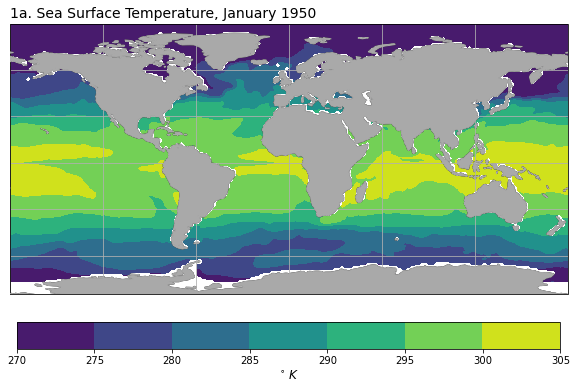

In [7]:
# Specify the projection you want to use
crs = ccrs.PlateCarree()

# Create a figure and axes using matplotlib
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
X = ds['xt_ocean']
Y = ds['yt_ocean']
Z = ds['temp'].sel(time='1950-01-16').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
# To overcome an issue with the discontinous nature of data in the x-dimension, use the add_cyclic_point function
Z, X = add_cyclic_point(Z,coord=X)

# Create a contour plot of SST
im = ax.contourf(X,Y,Z,transform=crs)

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()

# Give your plot a title
ax.set_title('1a. Sea Surface Temperature, January 1950',fontsize=14,loc='left')

# Finally, add a colorbar
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
cbar.set_label('$^\circ\,K$',fontsize=12)

Now zoom in on the North Atlantic, and explicitly specify which temperature contours to plot...

Text(0.0, 1.0, '1b. Zoom in North Atlantic')

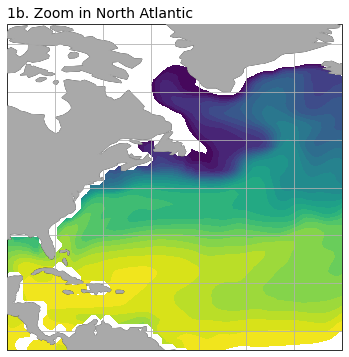

In [8]:
# Specift which contours to plot, by creating an array in numpy, then pass that array to contourf
import numpy as np
clevs = np.arange(275,300,1)

# Specify the projection you want to use
crs = ccrs.PlateCarree()

# Create a figure and axes using matplotlib
fig,ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
X = ds['xt_ocean']
Y = ds['yt_ocean']
Z = ds['temp'].sel(time='1950-01-16').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
# To overcome an issue with the continous nature of the data in the x-dimension, use the add_cyclic_point function
Z, X = add_cyclic_point(Z,coord=X)

# Create a contour plot of SST
im = ax.contourf(X,Y,Z,clevs,transform=crs)

# Zoom in on the North Atlantic region
ax.set_extent([-90,-20,25,50])

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()

# Cartopy determines the aspect ratio (width vs height) of the plot, based on the .set_extent and the projection.
# If we are determined that we wish the plot to be square (specified by the figsize option in plt.subplots()),
# we can use the following command to allow matplotlib to adjust the extent to ensure that the plot is square.
ax.set_adjustable('datalim')

# Give your plot a title
ax.set_title('1b. Zoom in North Atlantic',fontsize=14,loc='left')

## Time-series data
Visualise the change of global mean SST over time.  
Not all grid points in a model have the same surface area, so when calculating averages, we need to do an area weighting.  

In [24]:
# Load the area data
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
# Fix a slight mismatch in the area LAT and LON coordinates
# Set them to be the same as the temperature dataset 
area = area.assign_coords({'xt_ocean':ds['xt_ocean'],'yt_ocean':ds['yt_ocean']})
area

<xarray.DataArray 'AREA' (yt_ocean: 180, xt_ocean: 360)>
array([[1.078626e+08, 1.078626e+08, 1.078626e+08, ..., 1.078626e+08,
        1.078626e+08, 1.078626e+08],
       [3.235575e+08, 3.235575e+08, 3.235575e+08, ..., 3.235575e+08,
        3.235575e+08, 3.235575e+08],
       [5.391538e+08, 5.391538e+08, 5.391538e+08, ..., 5.391538e+08,
        5.391538e+08, 5.391538e+08],
       ...,
       [5.391538e+08, 5.391538e+08, 5.391538e+08, ..., 5.391538e+08,
        5.391538e+08, 5.391538e+08],
       [3.235575e+08, 3.235575e+08, 3.235575e+08, ..., 3.235575e+08,
        3.235575e+08, 3.235575e+08],
       [1.078626e+08, 1.078626e+08, 1.078626e+08, ..., 1.078626e+08,
        1.078626e+08, 1.078626e+08]], dtype=float32)
Coordinates:
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    name:       AREA
    long_name:  Suface Area of cells
    units:      m^2
    history:    From LEV_grid.nc

In [25]:
# Calculate the area-weighted mean sea-surface temperature
# This is very easy with xarray, using the .sum() command

# First work out where this land
oceanmask = np.isfinite(ds['temp'].isel(time=0).squeeze())
# Set the area variable to nan everwhere there is land, using .where()
area_masked = area.where(oceanmask,np.nan)
# Take the area-weighted mean
temp_mean = (ds['temp']*area_masked).sum(['xt_ocean','yt_ocean'])/(area_masked.sum(['xt_ocean','yt_ocean']))

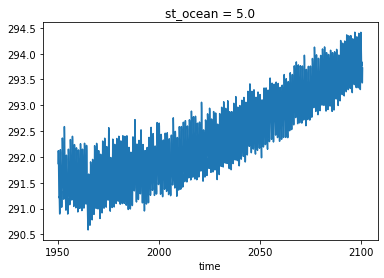

In [26]:
# Plot it
# (note that you may need to install nc-time-axis package in your conda environment to plot with time on the x-axis)
temp_mean.plot()

I will not do it here, but you can create a plot with changing colors as in the "What is a NetCDF file?" by following the example [here](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/multicolored_line.html).  
Now I will plot annual averages and a seasonal climatology. This is remarkably easy, using xarray's `groupby` function.

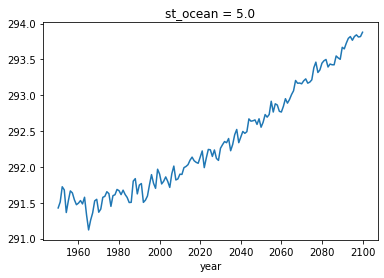

In [47]:
# Calculate the annual mean
temp_mean.groupby('time.year').mean().plot()

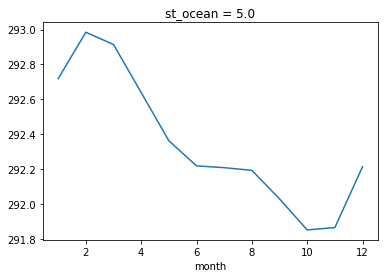

In [49]:
# Calculate the monthly climatology
temp_mean.groupby('time.month').mean().plot()

### A more complicated plot
Using `subplots` in `matplotlib`, we can plot all three of these as panels on the same figure.

Text(0.5, 0, 'Month')

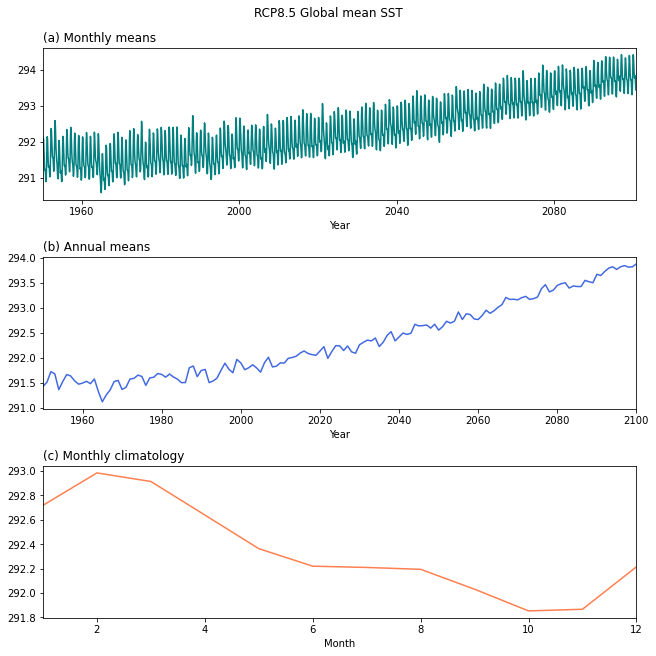

In [85]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(9,9),nrows=3,constrained_layout=True)
fig.suptitle('RCP8.5 Global mean SST') # Specify a figure title
# Monthly means
ax0.plot(temp_mean['time'],temp_mean,color='teal')
ax0.set_title('(a) Monthly means',loc='left')
ax0.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax0.set_xlabel('Year')
# Annual means
#   * use np.unique() to pick out an array of years
ax1.plot(np.unique(temp_mean['time.year']),temp_mean.groupby('time.year').mean(),color='royalblue')
ax1.set_title('(b) Annual means',loc='left')
ax1.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax1.set_xlabel('Year')
# Monthly climatology
#   * use np.unique() to pick out an array of months
ax2.plot(np.unique(temp_mean['time.month']),temp_mean.groupby('time.month').mean(),color='coral')
ax2.set_title('(c) Monthly climatology',loc='left')
ax2.autoscale(enable=True,axis='x',tight=True) # Make x-axis "tight"
ax2.set_xlabel('Month')

## Making your own plots
Here are a few ideas for plots that you could try to make using the examples above as a starting point:
* Spatial maps of temperature for different
    * points in time (monthly, or longer term averages)
    * emissions
* Spatial maps of temperature *change* between two different time periods
    * global maps
    * regional maps
* Time-series data for different regions (e.g. Atlantic basin, Southern Ocean)
    * monthly mean and annual averages displayed on the same plot?
* Change in the monthly climatology over time
* The Hovmuller plots and vertical profiles shown in "What is a NetCDF file?"